In [1]:
"""
plots for plane cross datast with cross validation for brain areas over a 
cutoff in both ABA and ST datasets

Shaina Lu
Zador & Gillis Labs
March 2021
"""

'\nplots for plane cross datast with cross validation for brain areas over a \ncutoff in both ABA and ST datasets\n\nShaina Lu\nZador & Gillis Labs\nMarch 2021\n'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

In [3]:
def set_style():
    #function for matplotlib formatting
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

In [4]:
def allkdeplts(train, test, cross1, cross2, traindataset, cross1dataset, cross2dataset, modeldes, ymaxval, savefile):
    if type(train) != bool:
        sns.kdeplot(train.values[np.triu_indices_from(train, k=1)], label="%s train" %traindataset,color='C2')
        
    if type(test) != bool:
        sns.kdeplot(test.values[np.triu_indices_from(test, k=1)], label="%s test (within)" %traindataset, color='C0')
        plt.vlines(x=np.mean(test.values[np.triu_indices_from(test, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C0')

    if type(cross1) != bool:
        sns.kdeplot(cross1.values[np.triu_indices_from(cross1.values, k=1)], label="%s trained in %s (cross)" %(cross1dataset,traindataset), color='C1')
        plt.vlines(x=np.mean(cross1.values[np.triu_indices_from(cross1, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C1')
        
    if type(cross2) != bool:
        sns.kdeplot(cross2.values[np.triu_indices_from(cross2.values, k=1)], label="%s trained in %s (cross)" %(cross2dataset,traindataset), color='C3')
        plt.vlines(x=np.mean(cross2.values[np.triu_indices_from(cross2, k=1)]), ymin=0, ymax=ymaxval, linestyles='--',color='C3')

    plt.xlabel("AUROC\n%s"%modeldes)
    plt.ylabel("density")
    plt.legend(loc=[1.0,0.5])

    if savefile != 0:
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()

In [5]:
def uppertrimean(data):
    return np.mean(data.values[np.triu_indices_from(data, k=1)])

# brain areas >100, dynamic alpha from CV

cutoff = 100 brain areas in each dataset, alpha is dynamic from grid search of [0.01, 0.05, 0.1, 0.2, 0.5, 0.9], best is first of ties

# train in ST, dynamic alpha

In [16]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STtrain_CV_032621.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STtest_CV_032621.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STtoCOR_CV_032621.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STtoSAG_CV_032621.csv"

BESTPARAMS_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STbestparams_032621.csv"
MEANTESTSCORE_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STmeantestscore_032621.npy"
TESTSTD_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_STmeanteststd_032621.npy"

In [7]:
trainST0p1 = pd.read_csv(TRAIN_FILE, sep=',')
trainST0p1 = trainST0p1.set_index(trainST0p1.columns)

testST0p1 = pd.read_csv(TEST_FILE, sep=',')
testST0p1 = testST0p1.set_index(testST0p1.columns)

STtoCOR0p1 = pd.read_csv(CROSS1_FILE, sep=',')
STtoCOR0p1 = STtoCOR0p1.set_index(STtoCOR0p1.columns)

STtoSAG0p1 = pd.read_csv(CROSS2_FILE, sep=',')
STtoSAG0p1 = STtoSAG0p1.set_index(STtoSAG0p1.columns)

In [8]:
trainST0p1.shape

(62, 62)

In [9]:
#means
print(uppertrimean(trainST0p1))
print(uppertrimean(testST0p1))
print(uppertrimean(STtoCOR0p1))
print(uppertrimean(STtoSAG0p1))

0.9890472285647984
0.9882850481654128
0.9856583148985469
0.7546166823123375


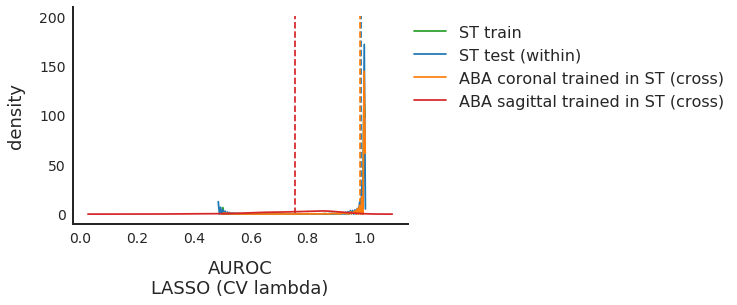

In [12]:
allkdeplts(trainST0p1, testST0p1, STtoCOR0p1, STtoSAG0p1, "ST", "ABA coronal", "ABA sagittal", "LASSO (CV lambda)",200, "032721_1.pdf")

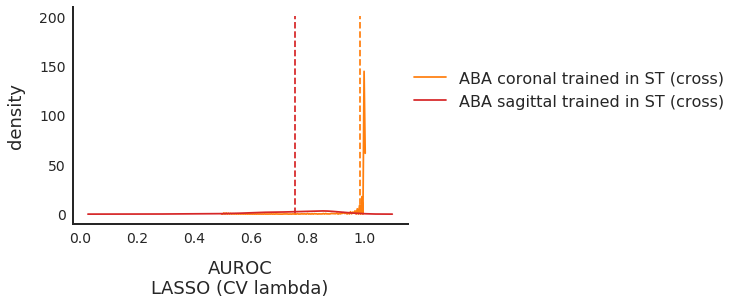

In [42]:
allkdeplts(False, False, STtoCOR0p1, STtoSAG0p1, "ST", "ABA coronal", "ABA sagittal", "LASSO (CV lambda)",200, False)

In [17]:
bestparams = pd.read_csv(BESTPARAMS_FILE, sep=',')
bestparams = bestparams.set_index(bestparams.columns)
meantestscore = np.load(MEANTESTSCORE_FILE,allow_pickle='TRUE').item()
teststd = np.load(TESTSTD_FILE,allow_pickle='TRUE').item()

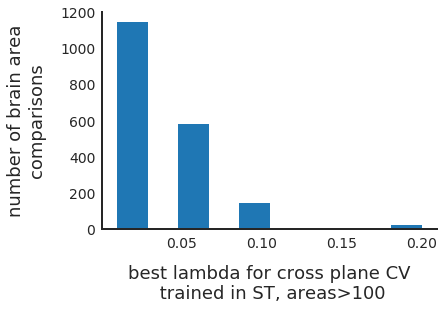

In [19]:
histdata = bestparams.values[np.triu_indices_from(bestparams,k=1)]
plt.hist(histdata)
plt.xlabel("best lambda for cross plane CV\n trained in ST, areas>100")
plt.ylabel("number of brain area\ncomparisons")
plt.savefig('032721_2.pdf', bbox_inches='tight')

# train in COR, dynamic alpha

In [51]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORtrain_CV_032621.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORtest_CV_032621.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORtoST_CV_032621.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORtoSAG_CV_032621.csv"

BESTPARAMS_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORbestparams_032621.csv"
MEANTESTSCORE_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORmeantestscore_032621.npy"
TESTSTD_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_CORmeanteststd_032621.npy"

In [52]:
train = pd.read_csv(TRAIN_FILE, sep=',')
train = train.set_index(train.columns)

test = pd.read_csv(TEST_FILE, sep=',')
test = test.set_index(test.columns)

cross1 = pd.read_csv(CROSS1_FILE, sep=',')
cross1 = cross1.set_index(cross1.columns)

cross2 = pd.read_csv(CROSS2_FILE, sep=',')
cross2 = cross2.set_index(cross2.columns)

In [53]:
train.shape

(62, 62)

In [54]:
#means
print(uppertrimean(train))
print(uppertrimean(test))
print(uppertrimean(cross1))
print(uppertrimean(cross2))

0.9994697864580758
0.9993855766143902
0.9020039234218538
0.692237537210484


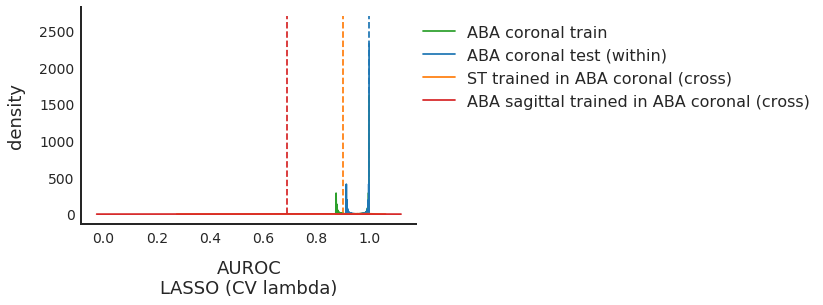

In [56]:
allkdeplts(train, test, cross1, cross2, "ABA coronal", "ST", "ABA sagittal", "LASSO (CV lambda)",2700, "032721_3.pdf")

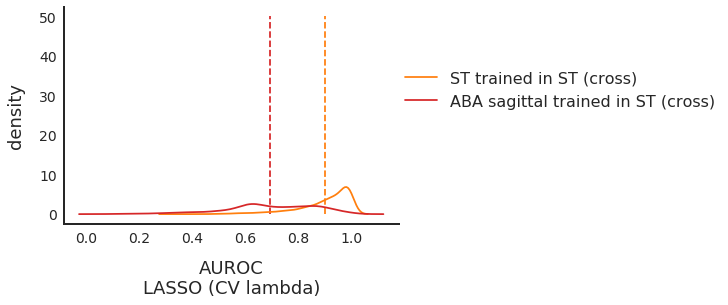

In [57]:
allkdeplts(False, False, cross1, cross2, "ST", "ST", "ABA sagittal", "LASSO (CV lambda)",50, False)

In [58]:
bestparams = pd.read_csv(BESTPARAMS_FILE, sep=',')
bestparams = bestparams.set_index(bestparams.columns)
meantestscore = np.load(MEANTESTSCORE_FILE,allow_pickle='TRUE').item()
teststd = np.load(TESTSTD_FILE,allow_pickle='TRUE').item()

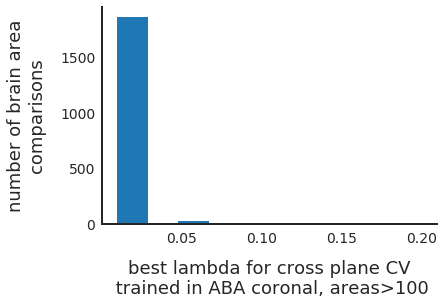

In [59]:
histdata = bestparams.values[np.triu_indices_from(bestparams,k=1)]
plt.hist(histdata)
plt.xlabel("best lambda for cross plane CV\n trained in ABA coronal, areas>100")
plt.ylabel("number of brain area\ncomparisons")
plt.savefig('032721_4.pdf', bbox_inches='tight')

# train in SAG, dynamic alpha

In [60]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGtrain_CV_032621.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGtest_CV_032621.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGtoST_CV_032621.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGtoCOR_CV_032621.csv"

BESTPARAMS_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGbestparams_032621.csv"
MEANTESTSCORE_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGmeantestscore_032621.npy"
TESTSTD_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane_SAGmeanteststd_032621.npy"

In [61]:
train = pd.read_csv(TRAIN_FILE, sep=',')
train = train.set_index(train.columns)

test = pd.read_csv(TEST_FILE, sep=',')
test = test.set_index(test.columns)

cross1 = pd.read_csv(CROSS1_FILE, sep=',')
cross1 = cross1.set_index(cross1.columns)

cross2 = pd.read_csv(CROSS2_FILE, sep=',')
cross2 = cross2.set_index(cross2.columns)

In [62]:
train.shape

(62, 62)

In [63]:
#means
print(uppertrimean(train))
print(uppertrimean(test))
print(uppertrimean(cross1))
print(uppertrimean(cross2))

0.9677276823529584
0.9606675253088268
0.7344173689112163
0.848469585543296


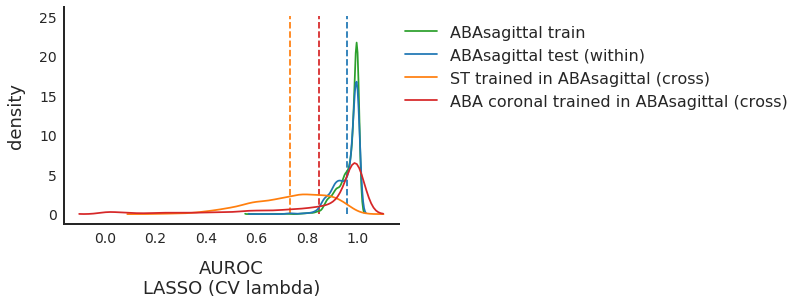

In [68]:
allkdeplts(train, test, cross1, cross2, "ABAsagittal", "ST", "ABA coronal", "LASSO (CV lambda)",25, "032721_5.pdf")

In [69]:
bestparams = pd.read_csv(BESTPARAMS_FILE, sep=',')
bestparams = bestparams.set_index(bestparams.columns)
meantestscore = np.load(MEANTESTSCORE_FILE,allow_pickle='TRUE').item()
teststd = np.load(TESTSTD_FILE,allow_pickle='TRUE').item()

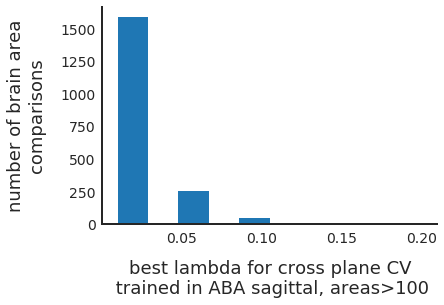

In [70]:
histdata = bestparams.values[np.triu_indices_from(bestparams,k=1)]
plt.hist(histdata)
plt.xlabel("best lambda for cross plane CV\n trained in ABA sagittal, areas>100")
plt.ylabel("number of brain area\ncomparisons")
plt.savefig('032721_6.pdf', bbox_inches='tight')

# brain areas >100 samples, alpha=0.1 fixed

# train in ST, fixed alpha=0.1

In [107]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_STtrain_0p1_032721.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_STtest_0p1_032721.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_STtoCOR_0p1_032721.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_STtoSAG_0p1_032721.csv"

In [108]:
train = pd.read_csv(TRAIN_FILE, sep=',')
train = train.set_index(train.columns)

test = pd.read_csv(TEST_FILE, sep=',')
test = test.set_index(test.columns)

cross1 = pd.read_csv(CROSS1_FILE, sep=',')
cross1 = cross1.set_index(cross1.columns)

cross2 = pd.read_csv(CROSS2_FILE, sep=',')
cross2 = cross2.set_index(cross2.columns)

In [109]:
train.shape

(62, 62)

In [110]:
#means
print(uppertrimean(train))
print(uppertrimean(test))
print(uppertrimean(cross1))
print(uppertrimean(cross2))

0.9915026986222769
0.9838394220988
0.9722167140550722
0.7298074943522876


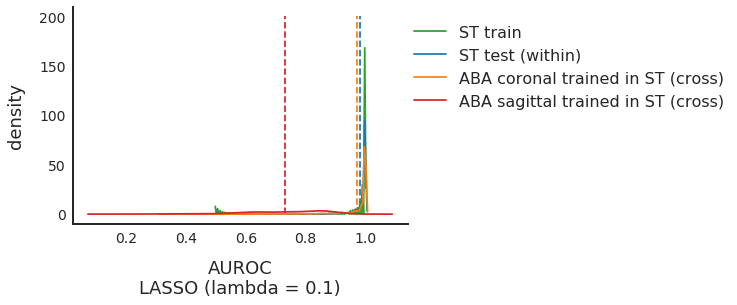

In [111]:
allkdeplts(train, test, cross1, cross2, "ST", "ABA coronal", "ABA sagittal", "LASSO (lambda = 0.1)",200, "033021_1.pdf")

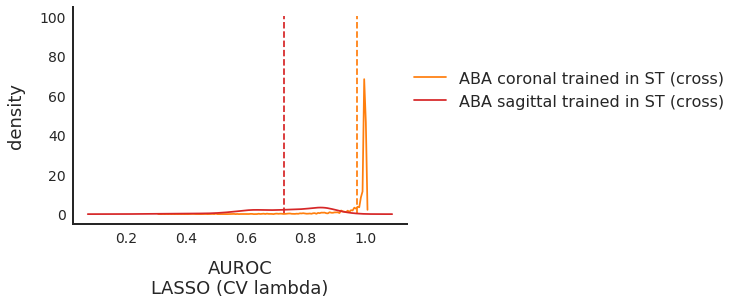

In [112]:
allkdeplts(False, False, cross1, cross2, "ST", "ABA coronal", "ABA sagittal", "LASSO (CV lambda)",100, False)

# train in COR, fixed alpha=0.1

In [85]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_CORtrain_0p1_032721.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_CORtest_0p1_032721.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_CORtoST_0p1_032721.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_CORtoSAG_0p1_032721.csv"

In [86]:
train = pd.read_csv(TRAIN_FILE, sep=',')
train = train.set_index(train.columns)

test = pd.read_csv(TEST_FILE, sep=',')
test = test.set_index(test.columns)

cross1 = pd.read_csv(CROSS1_FILE, sep=',')
cross1 = cross1.set_index(cross1.columns)

cross2 = pd.read_csv(CROSS2_FILE, sep=',')
cross2 = cross2.set_index(cross2.columns)

In [87]:
train.shape

(62, 62)

In [88]:
#means
print(uppertrimean(train))
print(uppertrimean(test))
print(uppertrimean(cross1))
print(uppertrimean(cross2))

0.999447261197713
0.9989952738734263
0.8716959133765697
0.6596762944240714


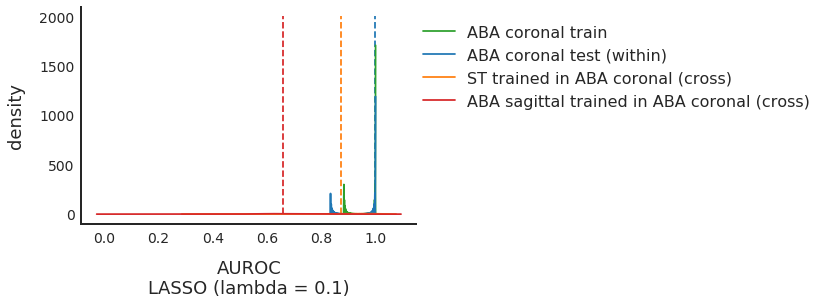

In [90]:
allkdeplts(train, test, cross1, cross2, "ABA coronal", "ST", "ABA sagittal", "LASSO (lambda = 0.1)",2000, "033021_2.pdf")

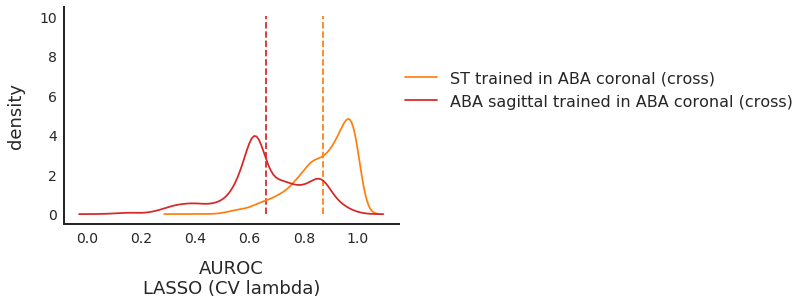

In [94]:
allkdeplts(False, False, cross1, cross2, "ABA coronal", "ST", "ABA sagittal", "LASSO (CV lambda)",10, False)


# train in SAG, fixed alpha=0.1

In [102]:
TRAIN_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_SAGtrain_0p1_032721.csv"
TEST_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_SAGtest_0p1_032721.csv"
CROSS1_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_SAGtoST_0p1_032721.csv"
CROSS2_FILE = "/home/slu/spatial/data/crossplane_lasso/CV/crossplane100_SAGtoCOR_0p1_032721.csv"

In [103]:
train = pd.read_csv(TRAIN_FILE, sep=',')
train = train.set_index(train.columns)

test = pd.read_csv(TEST_FILE, sep=',')
test = test.set_index(test.columns)

cross1 = pd.read_csv(CROSS1_FILE, sep=',')
cross1 = cross1.set_index(cross1.columns)

cross2 = pd.read_csv(CROSS2_FILE, sep=',')
cross2 = cross2.set_index(cross2.columns)

In [104]:
train.shape

(62, 62)

In [105]:
#means
print(uppertrimean(train))
print(uppertrimean(test))
print(uppertrimean(cross1))
print(uppertrimean(cross2))

0.940103013951694
0.9257796410989151
0.7456269786110076
0.8345244207260477


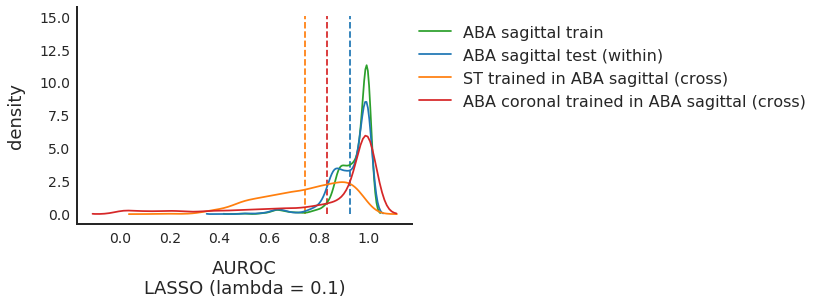

In [106]:
allkdeplts(train, test, cross1, cross2, "ABA sagittal", "ST", "ABA coronal", "LASSO (lambda = 0.1)",15, "033021_3.pdf")